**Lecture 9: ML**

### **Ex_21: Problem 1**

Download the California houses dataset and print dome informations

"Dataset obtained from the StatLib repository. The data contains information from the 1990 California census. The geographical area included varies inversely with the population density. The final data contained 20,640 observations on 9 variables. The dependent variable is `ln(median house value)`."

**Hint**: use the function `fetch_california_housing()`. It automatically download data from the web.

In [ ]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing() #automatically download data from the web

In [ ]:
X = california.data
y = california.target

##### **Step 0**: Normalize features and target between [0, 1] (e.g. by using `MinMaxScaler` from `sklearn.preprocessing`)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
X = min_max_scaler.fit_transform(X)

##### **Step 1**: Shuffle the data

In [ ]:
from sklearn.utils import shuffle
X, y = shuffle(X, y)

##### **Step 2**: Learn a linear regression model 

Perform 6-Fold Cross Validation to evaluate the model performance.

In [ ]:
n_folds = 6

# Define a linear model
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()

# Define 6-fold cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=n_folds, shuffle=True)

In [ ]:
r2_scores = []

for train_ids, test_ids in kf.split(X):
    
    # Split the data
    X_train, X_test = X[train_ids], X[test_ids]
    y_train, y_test = y[train_ids], y[test_ids]
    
    # fit a model    
    lrm.fit(X_train, y_train)
    
    # evaluate the model    
    r2_scores.append(lrm.score(X_test, y_test))
    print("R^2 score (test):", r2_scores[-1])
    
# Print average all over the folds
print("Average scores:")
print("Average R^2 score:", sum(r2_scores) / kf.get_n_splits(X))

R^2 score (test): 0.5961923599004915
R^2 score (test): 0.6122956493152476
R^2 score (test): 0.5970987343932544
R^2 score (test): 0.5743965380318282
R^2 score (test): 0.6087204930977868
R^2 score (test): 0.6242387937023971
Average scores:
Average R^2 score: 0.6021570947401677


##### **Step 3**: Learn a linear model on the same data using L1 regularization

Use grid search with 6-Fold cross validation to find the best hyper-parameters.

In [ ]:
# Define 
from sklearn.linear_model import Lasso
lasso = Lasso()

# Define grid search with 6-fold cross validation
from numpy import linspace
parameters = {'alpha': [10**-x for x in (5, 4, 3, 2, 1, 0)]}

from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(lasso, parameters, cv=n_folds)

gs.fit(X, y)

GridSearchCV(cv=6, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1]})

In [ ]:
# Maximum test score (AVERAGE AMONG FOLDS)
gs.cv_results_['mean_test_score']

array([ 6.02750640e-01,  6.03059321e-01,  5.96595329e-01,  5.82350947e-01,
        3.63557787e-01, -5.45432745e-04])

### **Ex_14**: Recall to the [Lec6 of ML](https://https://colab.research.google.com/drive/1V-oHu2ttfjycL3lbVa26Oo21-s0ohL19#scrollTo=icth5Sz1ET8c)


In [ ]:
from sklearn.metrics import confusion_matrix
#pylab inline
#Populating the interactive namespace from numpy and matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
y_true = ["cat", "ant", "cat", "cat", "ant", "bird", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat", "bird"]

In [ ]:
labels = ["ant", "bird", "cat"]

In [ ]:
cnf_matrix = confusion_matrix(y_true, y_pred,labels=labels) #normalize="true")

[Text(33.0, 0.5, 'Actual'), Text(0.5, 15.0, 'Predicted')]

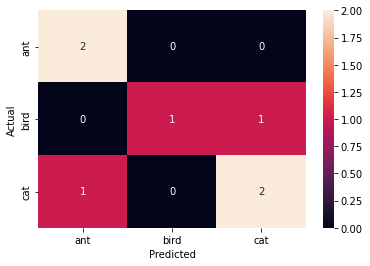

In [ ]:
df_cnf = pd.DataFrame(cnf_matrix, index = labels, columns = labels)
ax = sns.heatmap(df_cnf, annot=True)
ax.set(xlabel='Predicted', ylabel='Actual')

From the comfusion matrix extract accuracy, recall and precision. Extract the true positive, true negatives, false positive and false negatives from the matrix. Calulate accuracy,precision and recall for each class and visualize the results

In [ ]:
TP = np.diag(cnf_matrix)
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

In [ ]:
# Recall
Recall = TP/(TP+FN)
Precision = TP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

In [ ]:
import pandas as pd
pd.DataFrame(index=["Accuracy","Precision","Recall"],data=[ACC,Precision,Recall],columns=labels)

,ant,bird,cat
Accuracy,0.857143,0.857143,0.714286
Precision,0.666667,1.000000,0.666667
Recall,1.000000,0.500000,0.666667


# **Logistic Regression**

For regression problems the target **t = y(x)** was a numeric values

$$y = \beta_0 + \beta_1 x$$

For classification problems, there are different way of representing the target:
* For a 2-classes problem **t is in {0, 1}**
* For a multi-class problem **t is in {0, 1}^N**
 * For example: **t = (0, 0, 1, 0)** which means *t belongs to the third class*

One hot-encoding:

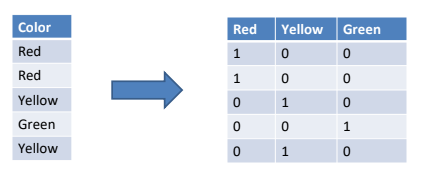

For classification problem we wish to predict class label, or more generally **probabilities** which lie in the range (0, 1)

To achive this we consider a generalization of the linear model:

$$y = f(\beta_0 + \beta_1x)$$

$y = f(\beta_0 + \beta_1x)$ - The function $f$ is known as **activation function**

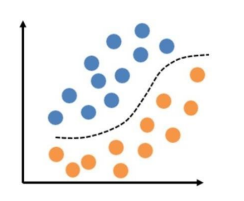

Points in $f (...) = constant$ constitute the **decision boundaries**

## **2-classes problem**

We have a set of data $X = {x1, x2, ..., xN}$

Each of them belong either to the *class 0* or *class 1*

We can indicate the probability of each class,
given an example x with (posterior probability):

$$ P_1 = P (C_1|x) =  \frac{P(x|C_1)P(C_1)}{P(x|C_1)P(C_1) + P(x|C_2)P(C_2)} $$

**Examples**

* Spam Detection
* Credit Card Fraud
* Health (i.e. Predicting if a given mass of tissue is benign or malignant)
* Marketing (i.e. Predicting if a given user will buy an insurance product or not)
* Banking (i.e. Predicting if a customer will default on a loan)

**Classification vs Regression**

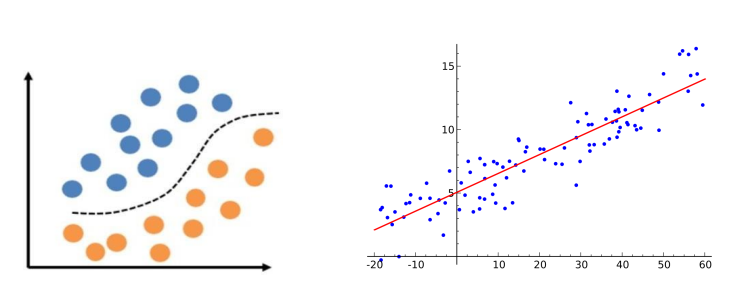


By taking the **log odds** of the event ($P_i$ is a prob. value between 0 and 1)

$$Z_i = ln(\frac{P_i}{1-P_i}) = \alpha + \beta_1 x_1 + ... + \beta_n x_n $$

**"Probability" vs "Odds"**:
* The *probability* that an event will occur is the fraction of times you expect to see that event in many trials
* The *odds* are defined as the probability that the event will occur divided by the probability that the event will not occur

Then, applying the exponent on both sides of the equation gives - **logistic sigmoid!:**

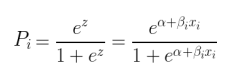

*Sigmoid* means S-shaped, it's also known as squashing function

## **Why not linear regression**

* Linear Regression is sensitive to imbalance data

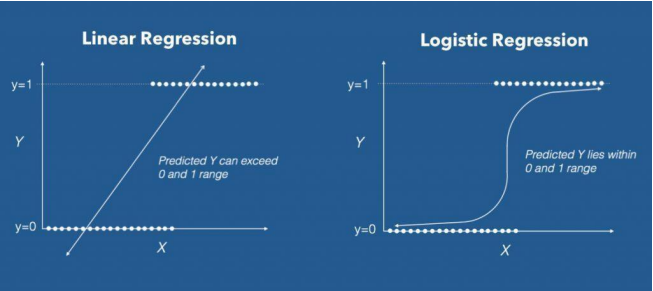

## **Logistic regression assumptions**

* The dependent variable to be binary
* Only the meaningful variables should be included
* The independent variables should be independent of each other. That is, the model should have little or no multicollinearity
* The independent variables are linearly related to the log odds

* **Logistic regression requires larger sample sizes, compared to linear regression!**

**Schematic of a logistic regression classifier**

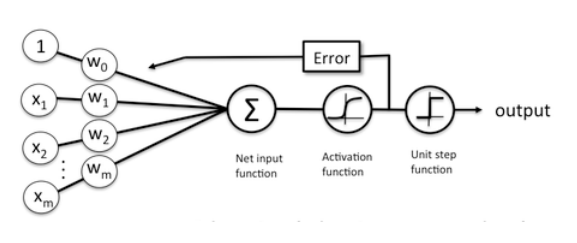

**Decision boundary of logistic regression**

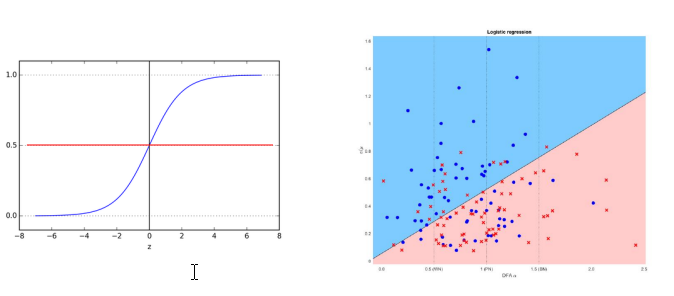

## **Generalization: Multi-Label Classification**

* We can generalize this notion to the case where an input $x$ can belong
to many classes $y$ simultaneously
* The probabilities for each class are given by the sigmoid of each class
score

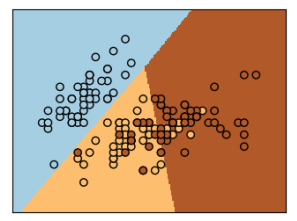

## **Logistic regression with SKLEARN**

```
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

#Use a penalty:
clf = LogisticRegression(penalty='none')
clf = LogisticRegression(penalty='l1')
clf = LogisticRegression(penalty='l2')
clf = LogisticRegression(penalty='elsticnet')
```



# **Coding**

### **Ex_22: Logistic Regression**

In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

from sklearn.utils import shuffle
X, y = shuffle(X, y)

* Classes: 3
* Samples per class: 50
* Samples total: 150
* Dimensionality: 4
* Features: real, positive

In [ ]:
# Print some examples
X[:20], y[:20]

(array([[6.3, 2.8, 5.1, 1.5],
        [6.9, 3.2, 5.7, 2.3],
        [6.1, 3. , 4.9, 1.8],
        [4.5, 2.3, 1.3, 0.3],
        [6.7, 3.1, 4.4, 1.4],
        [7.7, 3.8, 6.7, 2.2],
        [7.2, 3. , 5.8, 1.6],
        [5.9, 3. , 4.2, 1.5],
        [5.5, 2.5, 4. , 1.3],
        [6.3, 3.4, 5.6, 2.4],
        [6.7, 3. , 5.2, 2.3],
        [5.5, 3.5, 1.3, 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [5.8, 2.7, 5.1, 1.9],
        [7.9, 3.8, 6.4, 2. ],
        [6.4, 3.2, 5.3, 2.3],
        [6.2, 2.9, 4.3, 1.3],
        [5.6, 3. , 4.5, 1.5],
        [7.4, 2.8, 6.1, 1.9],
        [6.7, 3.1, 4.7, 1.5]]),
 array([2, 2, 2, 0, 1, 2, 2, 1, 1, 2, 2, 0, 0, 2, 2, 2, 1, 1, 2, 1]))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
# Train a logistic regression for classification
clf = LogisticRegression(solver='lbfgs', multi_class='auto')
clf.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# In the case of a classifier, score() returns the mean accuracy on the given test data and labels.
clf.score(X_test, y_test)

1.0

#### **Problem 1**: Learn a logistic regression model on the DIGITS problem

##### **Step 0**

- Download the dataset
- shuffle the examples
- Print out some informations (number of examples, feature size and number of classes)
- Split on training (70%) and test (30%) set
- Plot some digits images (they are 8-by-8 pixel images)

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

X, y = digits.data, digits.target

In [ ]:
import numpy as np
print("Number of samples: {}\nFeature size: {}\nNumber of classes: {}".format(X.shape[0], X.shape[1], len(np.unique(y))))

from sklearn.utils import shuffle
X, y = shuffle(X, y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, shuffle=True)

Number of samples: 1797
Feature size: 64
Number of classes: 10


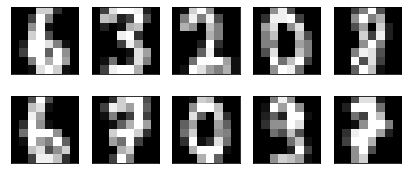

In [ ]:
# Plot
import matplotlib.pyplot as plt
%matplotlib inline
f = plt.figure(figsize=(7, 3))
for index, image in enumerate(X[:10]):
    
    image = image.reshape((8, 8))

    sub = f.add_subplot(2, 5, index + 1)
    sub.imshow(image, cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])

plt.show()

##### **Step 1**

* Learn a logistic regression model on the training set
* Print out the score calculated on the test set

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train a logistic regression for classification
clf = LogisticRegression(solver='lbfgs', multi_class='auto', penalty='none')
clf.fit(X_train, y_train)
print("Score (test):", clf.score(X_test, y_test))

Score (test): 0.9666666666666667


##### **Step 2** Does regularization help?

In [ ]:
# Train a logistic regression for classification
clf = LogisticRegression(solver='lbfgs', multi_class='auto', penalty='none')
clf.fit(X_train, y_train)
print("Score (test):", clf.score(X_test, y_test),"(penalty: none)")

clf = LogisticRegression(solver='lbfgs', multi_class='auto', penalty='l2')
clf.fit(X_train, y_train)
print("Score (test):", clf.score(X_test, y_test), "(penalty: l2)")

Score (test): 0.9666666666666667 (penalty: none)
Score (test): 0.9666666666666667 (penalty: l2)


In [ ]:
from sklearn.model_selection import GridSearchCV

n_folds = 4

Penalties = {'elasticnet', 'none'}
parameters = {'C': [.0001, .5, 100.],'l1_ratio': [.2, .5, .8]}

for p in Penalties:    
    # Define a linear model
    from sklearn.linear_model import LogisticRegression
    clf = LogisticRegression(penalty=p, solver='saga')
    # K-fold CV with Grid Search 
    if p == 'none':
        gs = GridSearchCV(clf, {}, cv=3)
    else:
        gs = GridSearchCV(clf, parameters, cv=3)
    print("Fitting the model...")
    gs.fit(X_train, y_train)    
    clf = gs.best_estimator_    
    acc = clf.score(X_test, y_test)
    print("\n\nPenalty: {}\nAccuracy (test):{}".format(p, acc))

Fitting the model...


Penalty: none
Accuracy (test):0.9722222222222222
Fitting the model...


Penalty: elasticnet
Accuracy (test):0.9722222222222222


##### **Step 3** Print the confusion matrix of the last model learned

[Text(33.0, 0.5, 'Actual'), Text(0.5, 15.0, 'Predicted')]

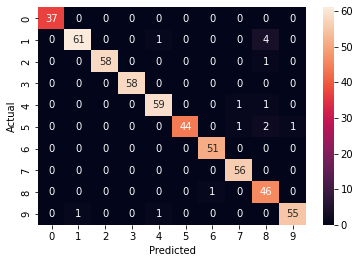

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

labels = np.unique(y_train)
cnf_matrix = confusion_matrix(clf.predict(X_test), y_test,labels = labels)
df_cnf = pd.DataFrame(cnf_matrix, index = labels, columns = labels)
ax = sns.heatmap(df_cnf, annot=True)
ax.set(xlabel='Predicted', ylabel='Actual')

#### **Problem 2**

##### **Step 1:**Learn a Logistic regression model on the dataset MNIST DATASET

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import time
import numpy as np

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print("Number of samples: {}\nFeature size: {}\nNumber of classes: {}".format(X.shape[0], X.shape[1], len(np.unique(y))))

X, y = shuffle(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, shuffle=True)
start_time = time.time()

clf = LogisticRegression(solver='lbfgs', multi_class='auto')
clf.fit(X_train, y_train)
print("Score (test):", clf.score(X_test, y_test))

print("\n\n\n--- {} seconds ---".format(time.time() - start_time))

Number of samples: 70000
Feature size: 784
Number of classes: 10
Score (test): 0.91825



--- 37.209527254104614 seconds ---


##### **Step 2:** Print the confusion matrix of the last model learned

[Text(69.0, 0.5, 'Actual'), Text(0.5, 69.0, 'Predicted')]

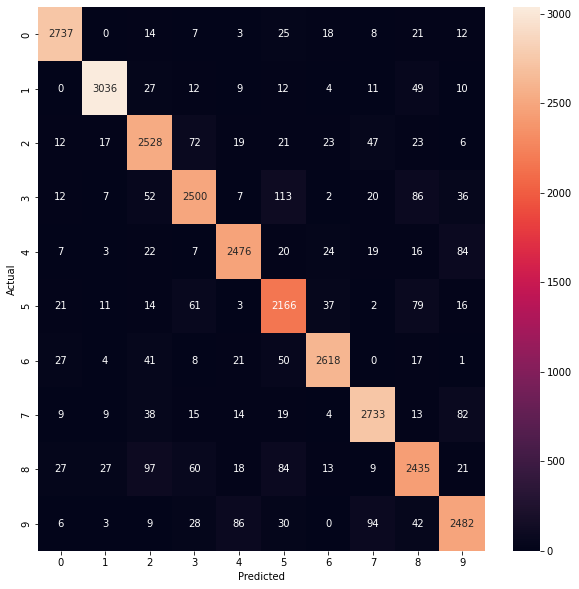

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

labels = np.unique(y_train)
cnf_matrix = confusion_matrix(clf.predict(X_test), y_test,labels = labels)
df_cnf = pd.DataFrame(cnf_matrix, index = labels, columns = labels)
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(df_cnf, annot=True, fmt="d")
ax.set(xlabel='Predicted', ylabel='Actual')